In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import gc
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rainfall-data-from-1901-to-2017-for-india/Rainfall_Data_LL.csv


In [2]:
df=pd.read_csv('/kaggle/input/rainfall-data-from-1901-to-2017-for-india/Rainfall_Data_LL.csv')

In [3]:
df.head()

,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,ROW1,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,ROW2,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,ROW3,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,ROW4,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,ROW5,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4187 non-null   object 
 1   SUBDIVISION     4187 non-null   object 
 2   YEAR            4187 non-null   int64  
 3   JAN             4187 non-null   float64
 4   FEB             4187 non-null   float64
 5   MAR             4187 non-null   float64
 6   APR             4187 non-null   float64
 7   MAY             4187 non-null   float64
 8   JUN             4187 non-null   float64
 9   JUL             4187 non-null   float64
 10  AUG             4187 non-null   float64
 11  SEP             4187 non-null   float64
 12  OCT             4187 non-null   float64
 13  NOV             4187 non-null   float64
 14  DEC             4187 non-null   float64
 15  ANNUAL          4187 non-null   float64
 16  Jan-Feb         4187 non-null   float64
 17  Mar-May         4187 non-null   f

# How many Rows and Columns

In [5]:
df.shape

(4187, 22)

# Let's Check How many subdivisions are there

In [6]:
subdivision = list(df.SUBDIVISION.unique())
len(subdivision)

36

# Let's check how many years data it has 

In [7]:
year = list(df.YEAR.unique())
len(year)

117

# Add the column Average Rain Fall in the data set 

In [8]:
df['Average']=df.loc[:,'JAN':'DEC'].mean(axis=1)
df.head()

,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude,Average
0,ROW1,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165,281.100000
1,ROW2,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165,293.391667
2,ROW3,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165,246.450000
3,ROW4,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165,256.633333
4,ROW5,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165,213.891667


In [9]:
df.columns

Index(['Name', 'SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'June-September', 'Oct-Dec', 'Latitude', 'Longitude',
       'Average'],
      dtype='object')

# Let's Reshape the data

In [10]:
melted_df= pd.melt(df,id_vars = ['SUBDIVISION', 'YEAR', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'June-September', 'Oct-Dec', 'Latitude', 'Longitude', 'Average'],value_vars = df.columns[3:15],var_name='Month',value_name='Rain_Fall')
column_names = ['SUBDIVISION', 'YEAR','Month','Rain_Fall', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'June-September',
       'Oct-Dec', 'Latitude', 'Longitude', 'Average']
melted_df = melted_df.reindex(columns = column_names)
melted_df.head()


,SUBDIVISION,YEAR,Month,Rain_Fall,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude,Average
0,Andaman & Nicobar Islands,1901,JAN,49.2,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165,281.100000
1,Andaman & Nicobar Islands,1902,JAN,0.0,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165,293.391667
2,Andaman & Nicobar Islands,1903,JAN,12.7,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165,246.450000
3,Andaman & Nicobar Islands,1904,JAN,9.4,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165,256.633333
4,Andaman & Nicobar Islands,1905,JAN,1.3,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165,213.891667


# Let's Find the mean min and max rainfall for all subdivision

In [11]:
df1=melted_df.groupby(['SUBDIVISION'])['Rain_Fall'].agg(['mean','min','max'])
df1.reset_index(inplace=True)
df1.head()

,SUBDIVISION,mean,min,max
0,Andaman & Nicobar Islands,241.808705,0.0,973.1
1,Arunachal Pradesh,284.231082,0.0,2362.8
2,Assam & Meghalaya,214.927778,0.0,995.2
3,Bihar,99.713889,0.0,580.1
4,Chhattisgarh,114.095157,0.0,630.6


# Lowest Average Annual Rainfall

In [12]:
melted_df[['SUBDIVISION','ANNUAL']].groupby(['SUBDIVISION']).mean().sort_values('ANNUAL').iloc[0]

ANNUAL    294.115385
Name: West Rajasthan, dtype: float64

# Highest Average Annual Rainfall 

In [13]:
melted_df[['SUBDIVISION','ANNUAL']].groupby(['SUBDIVISION']).mean().sort_values('ANNUAL').iloc[-1]

ANNUAL    3410.772981
Name: Arunachal Pradesh, dtype: float64

# Region with maximum Rainfall in a month

In [14]:
melted_df[['SUBDIVISION','YEAR','Month','Rain_Fall']].sort_values('Rain_Fall').iloc[-1]

SUBDIVISION    Arunachal Pradesh
YEAR                        1948
Month                        JUL
Rain_Fall                 2362.8
Name: 25266, dtype: object

# Region wise Average Rain Fall 

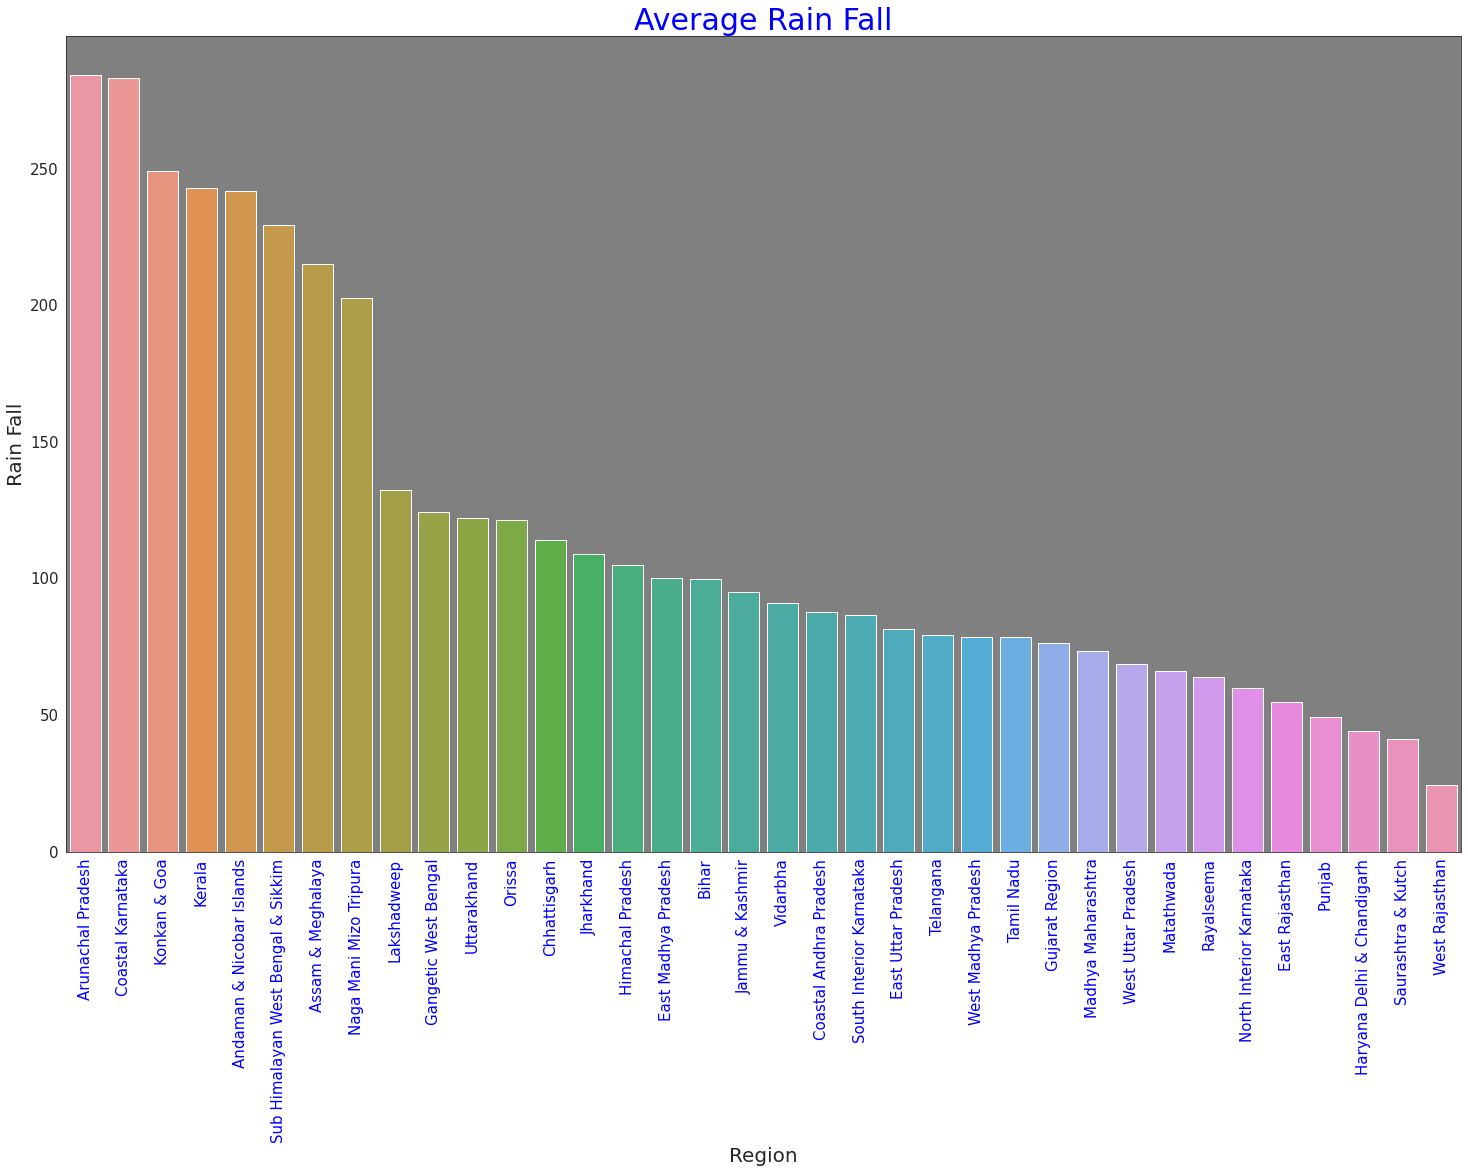

In [15]:
sns.set_style("white",{"axes.facecolor":"grey"})
plt.figure(figsize=(25,15))
a=sns.barplot(x='SUBDIVISION',y='mean',data=df1,order=df1.sort_values(['mean'],ascending = False).SUBDIVISION)
a.set_title("Average Rain Fall",size=30,color='blue')
plt.xlabel("Region",size=20)
plt.ylabel("Rain Fall",size=20)
plt.yticks(size=15)
plt.xticks(rotation=90,size=15,color='blue')
plt.show()






# Month Wise Average Rain Fall

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

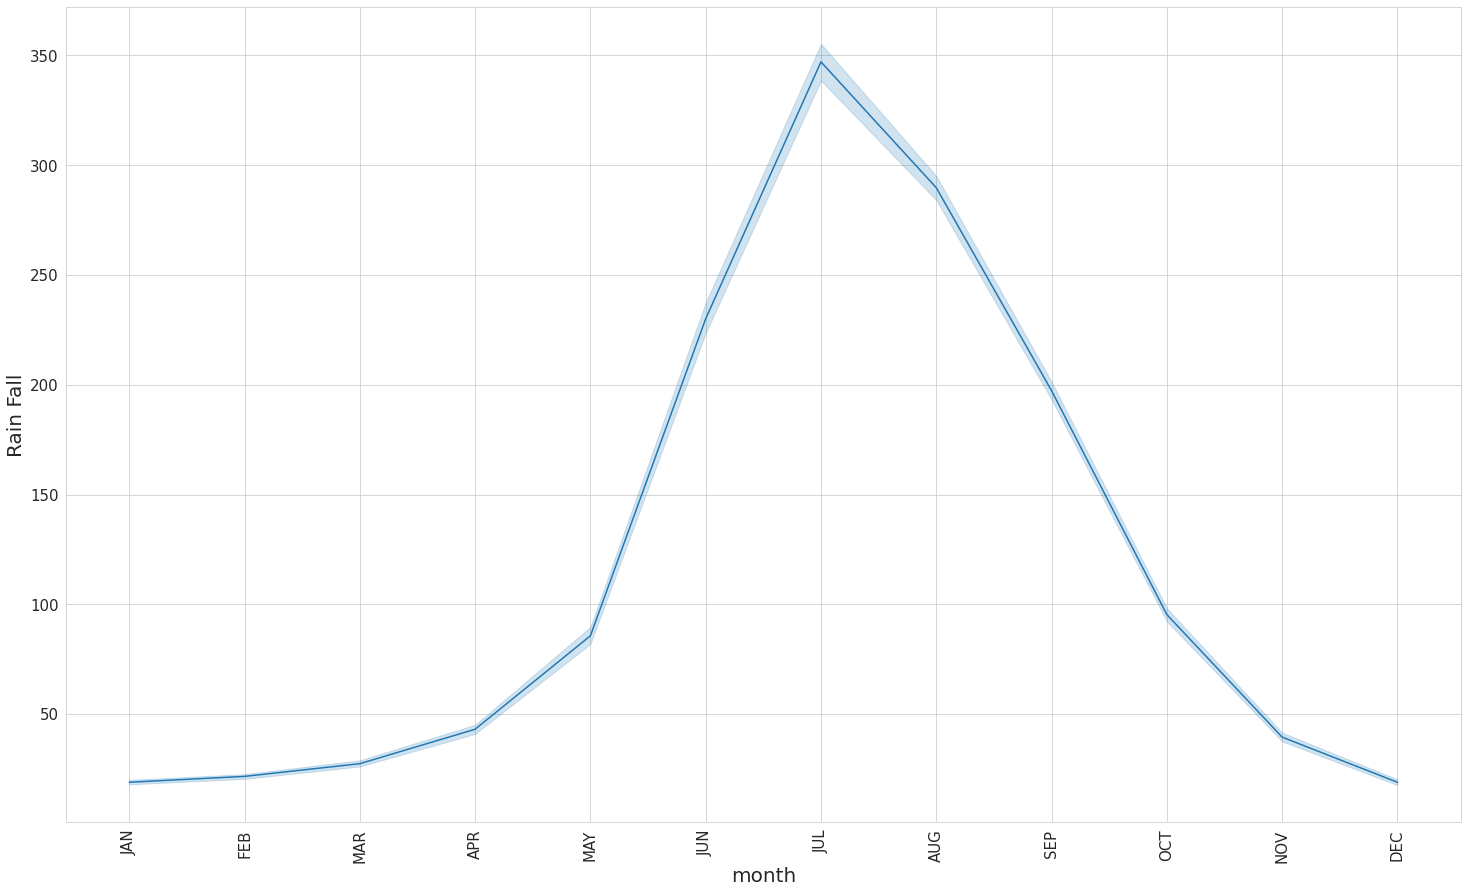

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(25,15))
sns.lineplot(x='Month',y='Rain_Fall',data=melted_df)
plt.xlabel("month",size=20)
plt.ylabel("Rain Fall",size=20)
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)


# Region wise Annual Rain Fall

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

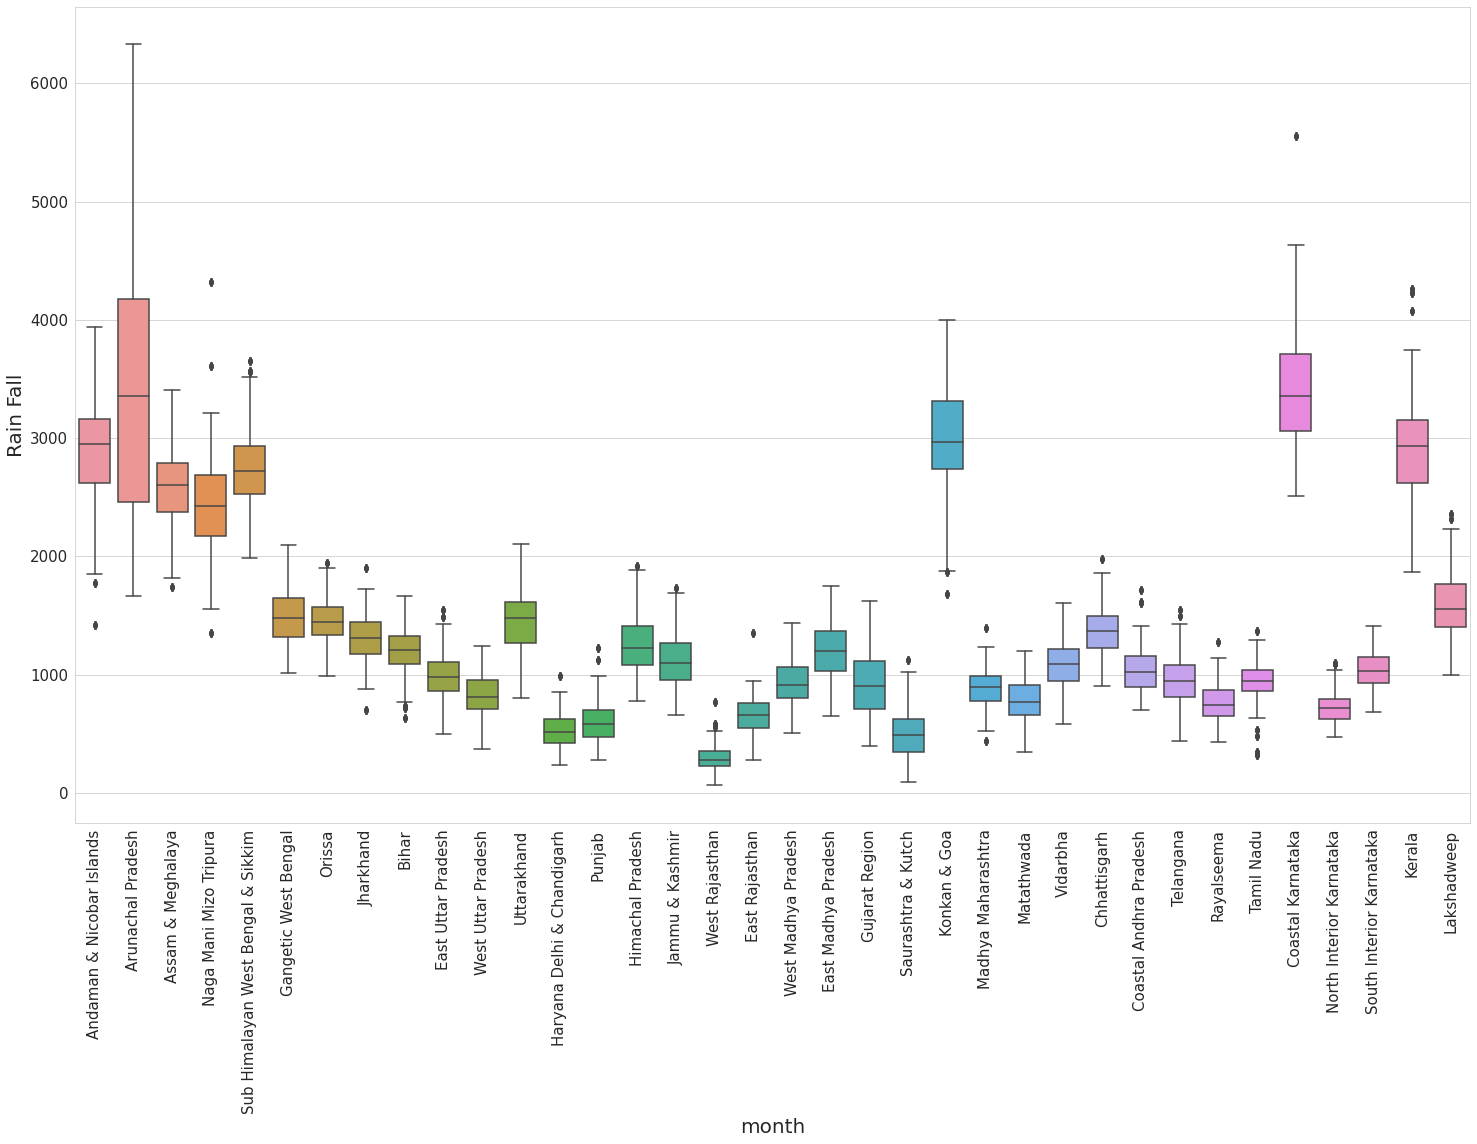

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(25,15))
sns.boxplot(x='SUBDIVISION',y='ANNUAL',data=melted_df)
plt.xlabel("month",size=20)
plt.ylabel("Rain Fall",size=20)
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)

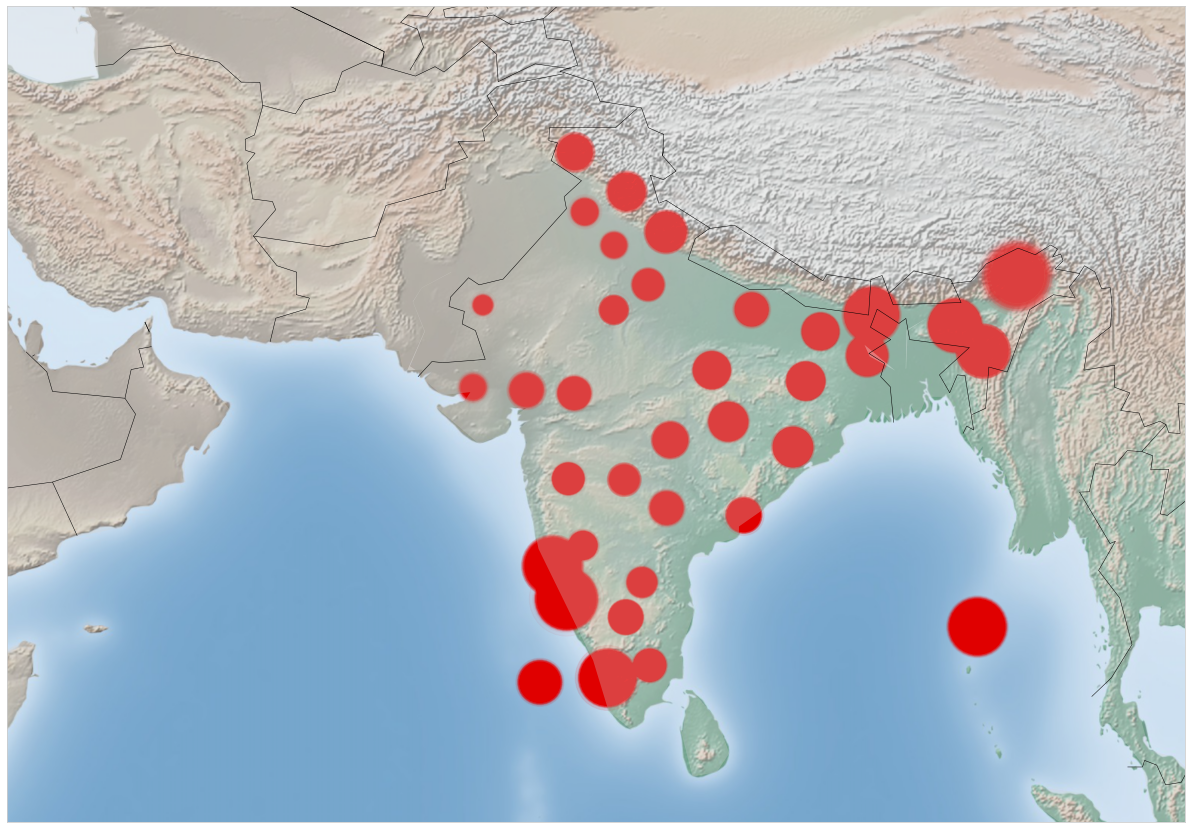

In [18]:
plt.figure(figsize=(30,15))

m=Basemap(llcrnrlon=50, llcrnrlat=4, urcrnrlon=102, urcrnrlat=40, resolution = 'c') 
m.shadedrelief()
m.drawcountries()
m.fillcontinents(color='lightgray', alpha=0.3)

m.scatter(np.array(df['Longitude']),np.array(df['Latitude']), s=np.array(df['ANNUAL']),color='Red',alpha=0.03)
plt.show()